## **Problem Statement Overview:**

Santander is a bank from Spain. They offer personalized product recommendations to their customers.

In the current system, Few customers are getting many recommendations while many customers rarely see any recommendations, resuling in uneven customer exerience.

Now Santander Bank wants to predict which products their existing customers will use in the next month based on their past behavior and that of similar customers .e.g.’Credit Card’,’Savings Account’,etc .in next month.

We are provided with 1.5 years of customer behavior data from Satander Bank.

### **Data Overview:** 

- We’re provided with 3 csv files, sample_submissions.csv, train_ver2.csv and test_ver2.csv 

- Train_ver2.csv contains 13,647,309 records with 48 columns, 

- Test_ver2.csv contains 929,615 records with 48 columns and 

- Sample_submissions.csv file contains few sample records. 

- Data is divided into 2 parts:- First 24 columns in the dataset have Customer related data and next 24 columns i.e 25-48 have Product related data. 

- Customer related data includes columns like ‘Customers Country Residence’, ’Age’, ’Gender’, ’Seniority’, ‘Customer type’, ‘Provinence name’etc. 

- Product related data includes fields like ‘Saving Accounts’, ‘Guarantees’, ‘Current Accounts’ etc.  

- fetcha_dato column in the dataset works as partitioner column. It contains day 28 of each month. We will be splitting data based on this column. 

- Ncodepers column has Customer code, which is unique for every customer. 

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"piyushb143","key":"9602b2f3087be115a1b49a8d7b3ed6e6"}'}

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c santander-product-recommendation

100% 228M/228M [00:10<00:00, 27.4MB/s]
100% 228M/228M [00:10<00:00, 22.0MB/s]


In [6]:
!unzip santander-product-recommendation.zip

Archive:  santander-product-recommendation.zip
  inflating: sample_submission.csv.zip  
  inflating: test_ver2.csv.zip       
  inflating: train_ver2.csv.zip      


In [7]:
!unzip train_ver2.csv.zip

Archive:  train_ver2.csv.zip
  inflating: train_ver2.csv          


In [8]:
!unzip test_ver2.csv.zip

Archive:  test_ver2.csv.zip
  inflating: test_ver2.csv           


In [9]:
!unzip sample_submission.csv.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


In [10]:
import pandas as pd
import numpy as np

In [11]:
def Combine(dict1, dict2):
    return(dict2.update(dict1))


str_with_nulls = ['fecha_dato','ncodpers','ind_empleado','pais_residencia','sexo','age','fecha_alta','ind_nuevo','antiguedad','indrel','ult_fec_cli_1t',
 'indrel_1mes','tiprel_1mes','indresi','indext','conyuemp','canal_entrada','indfall','tipodom','cod_prov','nomprov','ind_actividad_cliente','renta','segmento','ind_pres_fin_ult1',
 'ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']



str_with_nulls_dict = {}
for i in str_with_nulls:
  str_with_nulls_dict[i] = 'string'

#Reducing size to int8, to improve speed and save memory
ReduceCol = {'ind_ahor_fin_ult1':'int8','ind_aval_fin_ult1':'int8','ind_cco_fin_ult1':'int8','ind_cder_fin_ult1':'int8','ind_cno_fin_ult1':'int8','ind_ctju_fin_ult1':'int8',
             'ind_ctma_fin_ult1':'int8',	'ind_ctop_fin_ult1':'int8',	'ind_ctpp_fin_ult1':'int8',	'ind_deco_fin_ult1':'int8',	'ind_deme_fin_ult1':'int8',	'ind_dela_fin_ult1':'int8',	'ind_ecue_fin_ult1':'int8',	'ind_fond_fin_ult1':'int8',	'ind_hip_fin_ult1':'int8',	'ind_plan_fin_ult1':'int8'}


Combine(str_with_nulls_dict,ReduceCol)


In [12]:
len(ReduceCol)

48

**We'll be using Sample Dataset as Test Dataset**

In [13]:
DATA= pd.read_csv('train_ver2.csv', dtype=ReduceCol)

In [14]:
DATA['fecha_dato'].value_counts()

2016-05-28    931453
2016-04-28    928274
2016-03-28    925076
2016-02-28    920904
2016-01-28    916269
2015-12-28    912021
2015-11-28    906109
2015-10-28    892251
2015-09-28    865440
2015-08-28    843201
2015-07-28    829817
2015-06-28    632110
2015-05-28    631957
2015-04-28    630367
2015-03-28    629209
2015-02-28    627394
2015-01-28    625457
Name: fecha_dato, dtype: Int64

In [15]:
#Splitting Dataset By Time

DATA_XTrain = DATA[DATA['fecha_dato']!='2016-05-28']
DATA_XTest = DATA[DATA['fecha_dato'] =='2016-05-28']

In [16]:
del DATA

In [17]:
DATA_XTrain.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
DATA_XTrain.shape

(12715856, 48)

In [19]:
DATA_XTest.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
12715856,2016-05-28,657640,N,ES,H,68,2006-11-17,0,114,1,...,0,0,0,0,0,0,0,0,0,0
12715857,2016-05-28,657788,N,ES,H,42,2006-11-18,0,114,1,...,0,0,0,0,0,0,0,0,0,0
12715858,2016-05-28,657795,N,ES,V,44,2006-11-18,0,114,1,...,0,0,0,0,0,0,0,0,0,0
12715859,2016-05-28,657790,N,ES,V,42,2006-11-18,0,114,1,...,0,0,0,0,1,0,0,1,1,1
12715860,2016-05-28,657794,N,ES,H,49,2006-11-18,0,114,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
DATA_XTest.shape

(931453, 48)

**2. DATA CLEANING**

In [21]:
#Chaning Data type of following columns
DATA_XTrain['ncodpers'] = DATA_XTrain['ncodpers'].astype(np.int64)
DATA_XTrain['fecha_dato'] = DATA_XTrain['fecha_dato'].astype(np.datetime64)

DATA_XTest['ncodpers'] = DATA_XTest['ncodpers'].astype(np.int64)
DATA_XTest['fecha_dato'] = DATA_XTest['fecha_dato'].astype(np.datetime64)

**Creating Seperate Dataset to store Product Related Data.**

**In future this DataFrame will also work as dependent variable Y** 
- In both we are grouping by id, but in Customer Dataset we are taking last element,but in Prod Dataset We're taking max

In [22]:
#storing list of indices of product columns
ilocColProd = list(np.arange(24,48))
#adding col index of ncodpers
ilocColProd = [1]+ilocColProd

#Storing Product Related Data in Seperate Dataset
Prod_Data_YTrain = DATA_XTrain.iloc[:,ilocColProd].copy()
Prod_Data_YTest = DATA_XTest.iloc[:,ilocColProd].copy()


print('Shape of the Prod_Data is ',Prod_Data_YTrain.shape)
print('Shape of the Prod_DataY is ',Prod_Data_YTest.shape)

Shape of the Prod_Data is  (12715856, 25)
Shape of the Prod_DataY is  (931453, 25)


**Checking Null Values for each column in Prod_Data DataFrame.**

In [23]:
[print(i,'\t',j) for i,j in dict(Prod_Data_YTrain.isna().sum()).items() if j!=0]

ind_nomina_ult1 	 16063
ind_nom_pens_ult1 	 16063


[None, None]

In [24]:
[print(i,'\t',j) for i,j in dict(Prod_Data_YTest.isna().sum()).items() if j!=0]

[]

**Observation:-**

- As 0 Represents if customer has bought the product or not, So we can replace all the Null Values with 0
- No Null Values in Test Dataset

In [25]:
Prod_Data_YTrain.loc[Prod_Data_YTrain['ind_nomina_ult1'].isnull(),'ind_nomina_ult1' ] = '0'
Prod_Data_YTrain.loc[Prod_Data_YTrain['ind_nom_pens_ult1'].isnull(),'ind_nom_pens_ult1' ] = '0'

#Converting both the columns as np.int8
Prod_Data_YTrain['ind_nomina_ult1'] = Prod_Data_YTrain['ind_nomina_ult1'].astype(np.int8)
Prod_Data_YTrain['ind_nom_pens_ult1'] = Prod_Data_YTrain['ind_nom_pens_ult1'].astype(np.int8)

Grouping Data by column **ncodpers** and replacing all values in that group for every column with its max value

Why Replacing with Max value?
- In Dataset, 1 represents if user has bought the product or not
and product data is in binary form,so 1 is max value.
- If value for some user u and product p is 1, then it'll represent if the user has bought the product in 1.5 year.
- If 0, it shows user has not bought the product.



In [26]:
#eg, if ncodpers '112' has bought product 'ABC' as [1,0,0,1,1] -> it shows '112' has bought this products 3 times so replacing it with 1
Prod_Data_YTrain = Prod_Data_YTrain.groupby(['ncodpers']).max()
Prod_Data_YTrain = Prod_Data_YTrain.reset_index(drop=True)

Prod_Data_YTest = Prod_Data_YTest.groupby(['ncodpers']).max()
Prod_Data_YTest = Prod_Data_YTest.reset_index(drop=True)

print(Prod_Data_YTrain.shape)
print(Prod_Data_YTest.shape)

(951952, 24)
(931453, 24)


**Observation:**
- 931453 people have bought the Products in New Month

**Creating Seperate DataFrame for Customer Data**

In [27]:
ilocCol = list(np.arange(0,24))
DATA_XTrain = DATA_XTrain.iloc[:,ilocCol].copy()
DATA_XTest = DATA_XTest.iloc[:,ilocCol].copy()

DATA_XTrain.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1,...,N,<NA>,KHL,N,1,29,MALAGA,1,87218.1,02 - PARTICULARES
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1,...,S,<NA>,KHE,N,1,13,CIUDAD REAL,0,35548.74,03 - UNIVERSITARIO
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1,...,N,<NA>,KHE,N,1,13,CIUDAD REAL,0,122179.11000000002,03 - UNIVERSITARIO
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1,...,N,<NA>,KHD,N,1,50,ZARAGOZA,0,119775.54,03 - UNIVERSITARIO
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1,...,N,<NA>,KHE,N,1,50,ZARAGOZA,1,<NA>,03 - UNIVERSITARIO


In [28]:
#Sorting Dataset by fecha_dato,then ncodpers
DATA_XTrain.sort_values(by=['ncodpers','fecha_dato'],inplace=True,ignore_index=True)
DATA_XTest.sort_values(by=['ncodpers'],inplace=True,ignore_index=True)

In [29]:
#Deleting Duplicate ncodpers as we just want to predict for latest date
DATA_XTrain.drop_duplicates(subset=['ncodpers'], keep='last', inplace=True, ignore_index=True)
DATA_XTest.drop_duplicates(subset=['ncodpers'], keep='last', inplace=True, ignore_index=True)

In [30]:
print(DATA_XTrain.shape)
print(DATA_XTrain['ncodpers'].nunique())
print(DATA_XTest.shape)
print(DATA_XTest['ncodpers'].nunique())

(951952, 24)
951952
(931453, 24)
931453


In [31]:
DATA_XTrain.head(2)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-04-28,15889,F,ES,V,56,1995-01-16,0,254,1,...,N,N,KAT,N,1,28,MADRID,1,326124.9,01 - TOP
1,2016-04-28,15890,A,ES,V,63,1995-01-16,0,255,1,...,N,N,KAT,N,1,28,MADRID,1,71461.20000000001,01 - TOP


**Dealing with Null Values**

In [32]:
#Checking Null Values in Training and testing Dataset
[(i,j) for i,j in dict(DATA_XTrain.isna().sum()).items() if j!=0]

[('ind_empleado', 7051),
 ('pais_residencia', 7051),
 ('sexo', 7056),
 ('fecha_alta', 7051),
 ('ind_nuevo', 7051),
 ('indrel', 7051),
 ('ult_fec_cli_1t', 934401),
 ('indrel_1mes', 14428),
 ('tiprel_1mes', 14428),
 ('indresi', 7051),
 ('indext', 7051),
 ('conyuemp', 951828),
 ('canal_entrada', 18106),
 ('indfall', 7051),
 ('tipodom', 7051),
 ('cod_prov', 11066),
 ('nomprov', 11066),
 ('ind_actividad_cliente', 7051),
 ('renta', 242541),
 ('segmento', 18321)]

In [33]:
[(i,j) for i,j in dict(DATA_XTest.isna().sum()).items() if j!=0]

[('sexo', 5),
 ('ult_fec_cli_1t', 929583),
 ('indrel_1mes', 4010),
 ('tiprel_1mes', 4010),
 ('conyuemp', 931339),
 ('canal_entrada', 6699),
 ('cod_prov', 3992),
 ('nomprov', 3992),
 ('renta', 229018),
 ('segmento', 7025)]

**OBSERVATION:**
- Sum of null values of column 'ult_fec_cli_1t' and 'conyuemp' is 927932 which is Huge, close to the length of dataset. So these will not be useful features for predicting. So we can delete them.
- DROPPING "tipodom" as nomprov already contains proinance name and also "cod_prov" as it contains Province code and nomprov contains Province Name. So, cod_prov will not add any value
- There are similar number of values which are null in 7 columns i.e 7031. So Deleting them. 
- We can replace Null values in column 'renta' with mean


In [34]:
DATA_XTrain.drop(['ult_fec_cli_1t','conyuemp','tipodom','cod_prov'],axis=1,inplace=True)
DATA_XTest.drop(['ult_fec_cli_1t','conyuemp','tipodom','cod_prov'],axis=1,inplace=True)

In [35]:
ListDel = DATA_XTrain[DATA_XTrain['ind_empleado'].isnull()].index.tolist()
len(ListDel)

7051

In [36]:
DATA_XTrain.drop(ListDel,inplace=True,axis=0)
Prod_Data_YTrain.drop(ListDel,inplace=True,axis=0)
DATA_XTrain = DATA_XTrain.reset_index(drop=True)
Prod_Data_YTrain = Prod_Data_YTrain.reset_index(drop=True)
print(DATA_XTrain.shape)
print(Prod_Data_YTrain.shape)

(944901, 20)
(944901, 24)


In [37]:
#Null Values For Train Dataset
[(i,j) for i,j in dict(DATA_XTrain.isna().sum()).items() if j!=0]

[('sexo', 5),
 ('indrel_1mes', 7377),
 ('tiprel_1mes', 7377),
 ('canal_entrada', 11055),
 ('nomprov', 4015),
 ('renta', 235490),
 ('segmento', 11270)]

In [38]:
DATA_XTrain.loc[DATA_XTrain['sexo'].isnull(),'sexo' ] = 'V'
DATA_XTrain.loc[DATA_XTrain['indrel_1mes'].isnull(),'indrel_1mes' ] = '1'
DATA_XTrain.loc[DATA_XTrain['tiprel_1mes'].isnull(),'tiprel_1mes' ] = 'I'
#Replacing null values of canal_entrada,nomprov with new feature 'NUL','MIS' respectively to avoid class imbalance
DATA_XTrain.loc[DATA_XTrain['canal_entrada'].isnull(),'canal_entrada' ] = 'NUL'
DATA_XTrain.loc[DATA_XTrain['nomprov'].isnull(),'nomprov' ] = 'MIS'
DATA_XTrain.loc[DATA_XTrain['segmento'].isnull(),'segmento' ] = '02 - PARTICULARES'

In [39]:
#Replacing Null renta values with Average
DATA_XTrain['renta'] = DATA_XTrain['renta'].astype(float)
avg = DATA_XTrain['renta'].mean()
DATA_XTrain['renta'].fillna(value=avg, inplace=True)

In [40]:
#Null Values For Test Dataset
[(i,j) for i,j in dict(DATA_XTest.isna().sum()).items() if j!=0]

[('sexo', 5),
 ('indrel_1mes', 4010),
 ('tiprel_1mes', 4010),
 ('canal_entrada', 6699),
 ('nomprov', 3992),
 ('renta', 229018),
 ('segmento', 7025)]

In [41]:
DATA_XTest.loc[DATA_XTest['sexo'].isnull(),'sexo' ] = 'V'
DATA_XTest.loc[DATA_XTest['indrel_1mes'].isnull(),'indrel_1mes' ] = '1'
DATA_XTest.loc[DATA_XTest['tiprel_1mes'].isnull(),'tiprel_1mes' ] = 'I'
#Replacing null values of canal_entrada,nomprov with new feature 'NUL','MIS' respectively to avoid class imbalance
DATA_XTest.loc[DATA_XTest['canal_entrada'].isnull(),'canal_entrada' ] = 'NUL'
DATA_XTest.loc[DATA_XTest['nomprov'].isnull(),'nomprov' ] = 'MIS'
DATA_XTest.loc[DATA_XTest['segmento'].isnull(),'segmento' ] = '02 - PARTICULARES'

In [42]:
#Replacing Null renta values with Average
DATA_XTest['renta'] = DATA_XTest['renta'].astype(float)
avg = DATA_XTest['renta'].mean()
DATA_XTest['renta'].fillna(value=avg, inplace=True)

In [43]:
#Checking if there are still any null values
[print(i,j) for i,j in dict(DATA_XTrain.isna().sum()).items() if j!=0]

[]

In [44]:
[print(i,j) for i,j in dict(DATA_XTest.isna().sum()).items() if j!=0]

[]

**We have Succesfully Countered with all the missing values in DATASET**

**3. DATA CLEANING AND DATA VISUALIZATION**

- Checking Value Counts for all the Categorical Features
- For DATE Feature, we can replace them with months as customer purchasing beahviours changes with seasons

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

**1. fecha_dato**
- 	The table is partitioned for this column


In [46]:
print(DATA_XTrain.fecha_dato.value_counts())
print('-'*30)
print(DATA_XTest.fecha_dato.value_counts())

2016-04-28    928274
2015-12-28      3016
2015-10-28      2014
2016-01-28      1911
2016-02-28      1821
2015-11-28      1758
2015-09-28      1702
2016-03-28      1662
2015-07-28      1386
2015-08-28      1357
Name: fecha_dato, dtype: int64
------------------------------
2016-05-28    931453
Name: fecha_dato, dtype: int64


**2. ncodpers**
- Customer code
- Unique for every Customer

In [47]:
print('First id of Customer for Training dataset',DATA_XTrain.ncodpers.min())
print('Last id of Customer for Training dataset',DATA_XTrain.ncodpers.max())
print('-'*50)
print('First id of Customer for Test dataset',DATA_XTrain.ncodpers.min())
print('Last id of Customer for Test dataset',DATA_XTrain.ncodpers.max())

First id of Customer for Training dataset 15889
Last id of Customer for Training dataset 1548207
--------------------------------------------------
First id of Customer for Test dataset 15889
Last id of Customer for Test dataset 1548207


**Observation:**
- Oldest Customer and Newest Customer, Both have purchase record from last month

**3. ind_empleado**
- Employee index: A active, B ex employed, F filial, N not employee, P pasive

In [48]:
print('Train')
print(DATA_XTrain.ind_empleado.value_counts())
print('-'*20)
print('Test')
print(DATA_XTest.ind_empleado.value_counts())

Train
N    944381
B       219
F       152
A       148
S         1
Name: ind_empleado, dtype: Int64
--------------------
Test
N    930933
B       219
F       152
A       148
S         1
Name: ind_empleado, dtype: Int64


**OBSERVATION:**
- Values Count of the Category 'N' is Very high. It will dominate the results

In [49]:
#CountVectorizer is designed for text feature. So it removes 1 word features
#Using token_pattern to consider 1 word as feature
vectorizer = CountVectorizer(token_pattern='\w')
vectorizer.fit(DATA_XTrain['ind_empleado'].values)
DATA_XTrain_ind_empleado = vectorizer.transform(DATA_XTrain['ind_empleado'].values)
DATA_XTest_ind_empleado = vectorizer.transform(DATA_XTest['ind_empleado'].values)
DATA_XTrain_ind_empleado_colns = vectorizer.get_feature_names_out()
print(DATA_XTrain_ind_empleado.shape)
print(DATA_XTest_ind_empleado.shape)

(944901, 5)
(931453, 5)


**4. pais_residencia**
- Customer's Country residence

In [50]:
print('Train')
print(DATA_XTrain.pais_residencia.value_counts())
print('-'*20)
print('Test')
print(DATA_XTest.pais_residencia.value_counts())

Train
ES    940885
FR       316
AR       289
GB       287
DE       285
       ...  
AL         1
BM         1
DJ         1
GM         1
JM         1
Name: pais_residencia, Length: 118, dtype: Int64
--------------------
Test
ES    927461
FR       312
AR       289
GB       283
DE       280
       ...  
AL         1
BM         1
DJ         1
GM         1
JM         1
Name: pais_residencia, Length: 118, dtype: Int64


**OBSERVATION:**
- Values Count of the Category 'ES' is Very high. It will dominate the results.

In [51]:
vectorizer = CountVectorizer()
vectorizer.fit(DATA_XTrain['pais_residencia'].values)
DATA_XTrain_pais_residencia = vectorizer.transform(DATA_XTrain['pais_residencia'].values)
DATA_XTest_pais_residencia = vectorizer.transform(DATA_XTest['pais_residencia'].values)
DATA_XTrain_pais_residencia_colns = vectorizer.get_feature_names_out()
print(DATA_XTrain_pais_residencia.shape)
print(DATA_XTest_pais_residencia.shape)

(944901, 118)
(931453, 118)


**5. age**

In [52]:
DATA_XTrain['age']=DATA_XTrain['age'].astype(np.int16)
DATA_XTest['age']=DATA_XTest['age'].astype(np.int16)

In [53]:
import seaborn as sns

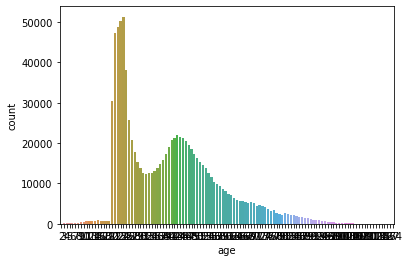

In [54]:
sns.countplot(x="age",data=DATA_XTrain)

In [55]:
DATA_XTrain['age'].value_counts()

24     51307
23     50226
22     48813
21     47154
25     38164
       ...  
114        4
117        2
127        1
164        1
115        1
Name: age, Length: 118, dtype: int64

**OBSERVATIONS:**
- Majority of the Users are between the the age of 18 and 26
- Distribution from 19 to 26 and from age 35 to 51 is Nicely distributed.
- The minimum age of the user is 2 and maximum age is 164.
- Maximum Number of Users are 51365 for age 24
- Minimum Number of Users is 1 for age 164,115,127

In [56]:
#Binning the age in 5 categries
bins = [0,18,33,50,80,200]
label =['Children','Young','Middle','Old','Very_Old']
DATA_XTrain['age'] = pd.cut(DATA_XTrain['age'], bins,labels = label)
DATA_XTest['age'] = pd.cut(DATA_XTest['age'], bins,labels = label)

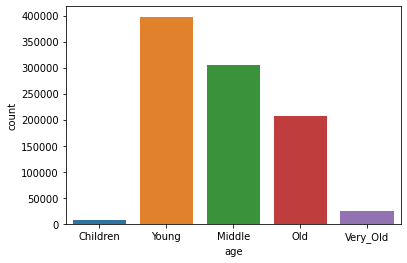

In [57]:
#AFTER Binning
sns.countplot(x="age",data=DATA_XTrain)

**OBSERVATIONS:**
- Addition to above observations, Number of customers are decreasing After 'Young' Age

In [58]:
vectorizer = CountVectorizer()
vectorizer.fit(DATA_XTrain['age'].values)
DATA_XTrain_age = vectorizer.transform(DATA_XTrain['age'].values)
DATA_XTest_age = vectorizer.transform(DATA_XTest['age'].values)
DATA_XTrain_age_colns = vectorizer.get_feature_names_out()
print(DATA_XTrain_age.shape)
print(DATA_XTest_age.shape)

(944901, 5)
(931453, 5)


**6. sexo**
- Customers Gender

In [59]:
print('Train')
print(DATA_XTrain.sexo.value_counts())
print('-'*20)
print('Test')
print(DATA_XTest.sexo.value_counts())

Train
V    512897
H    432004
Name: sexo, dtype: Int64
--------------------
Test
V    505587
H    425866
Name: sexo, dtype: Int64


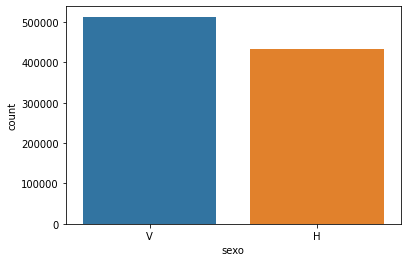

In [60]:
sns.countplot(x="sexo",data=DATA_XTrain)

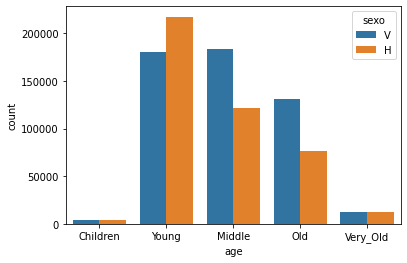

In [61]:
#Countplot of age with gender
sns.countplot(x="age",data=DATA_XTrain,hue='sexo')

**OBSERVATION:**
- Interesting!!! There are more Female users than Male in the age group of 18 to 33
- Number of Male users is pretty high in all the other age groups

In [62]:
vectorizer = CountVectorizer(token_pattern='\w')
vectorizer.fit(DATA_XTrain['sexo'].values)
DATA_XTrain_sexo = vectorizer.transform(DATA_XTrain['sexo'].values)
DATA_XTest_sexo = vectorizer.transform(DATA_XTest['sexo'].values)
DATA_XTrain_sexo_colns = vectorizer.get_feature_names_out()
print(DATA_XTrain_sexo.shape)
print(DATA_XTest_sexo.shape)

(944901, 2)
(931453, 2)


**7. fecha_alta**
- The date in which the customer became as the first holder of a contract in the bank
- Year of join can be a good useful field here
- We can Consider Just the day of the month or week or Month for insightfull Analysis

In [63]:
DATA_XTrain['fecha_alta'].head()

0    1995-01-16
1    1995-01-16
2    2015-07-28
3    1995-01-16
4    1997-10-03
Name: fecha_alta, dtype: string

In [64]:
DATA_XTrain['fecha_alta'] = pd.to_datetime(DATA_XTrain['fecha_alta'])
DATA_XTest['fecha_alta'] = pd.to_datetime(DATA_XTest['fecha_alta'] )

In [65]:
#strftime("%B") -> To get month, strftime("%A")-> To get week Days
DATA_XTrain['fecha_alta_month'] = DATA_XTrain['fecha_alta'].dt.strftime("%B")
DATA_XTest['fecha_alta_month'] = DATA_XTest['fecha_alta'].dt.strftime("%B")

DATA_XTrain['fecha_alta_day'] = DATA_XTrain['fecha_alta'].dt.strftime("%A")
DATA_XTest['fecha_alta_day'] = DATA_XTest['fecha_alta'].dt.strftime("%A")

In [66]:
#Creating Dataframe of value counts
fecha_alta_month_count = pd.DataFrame(DATA_XTrain['fecha_alta_month'].value_counts())
fecha_alta_day_count = pd.DataFrame(DATA_XTrain['fecha_alta_day'].value_counts())

**i) fecha_alta_month_count**

In [67]:
fecha_alta_month_count.head(2)

,fecha_alta_month
October,156160
September,111509


In [68]:
fecha_alta_month_count.tail(2)

,fecha_alta_month
May,44101
June,43844


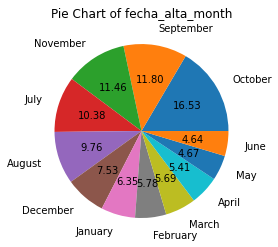

In [69]:
f_da = DATA_XTrain['fecha_alta_month'].value_counts().reset_index()

#Replacing other labels with blank space
#n - number of categories you want to show
n = 12
lenDl = len(fecha_alta_month_count) - 12
lenD = ['' for i in range(lenDl)]

mylabels = list(fecha_alta_month_count.index[:12])
mylabels = mylabels+lenD
mylabels = list(fecha_alta_month_count.index)

def autopct(pct):
  if pct > 1:
    return ('%.2f' % pct) 
  else:
    return ''

DATA_XTrain["fecha_alta_month"].value_counts().plot(x=None, y=None,title='Pie Chart of fecha_alta_month', kind='pie',pctdistance=0.6,autopct=autopct,labels=mylabels,labeldistance=1.2,ylabel='') 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

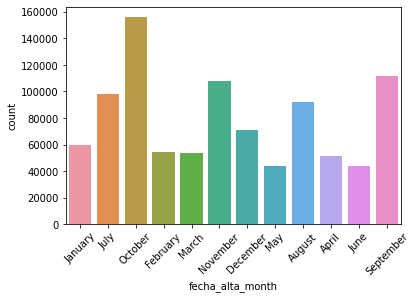

In [70]:
sns.countplot(x="fecha_alta_month",data=DATA_XTrain)
plt.xticks(rotation=45)

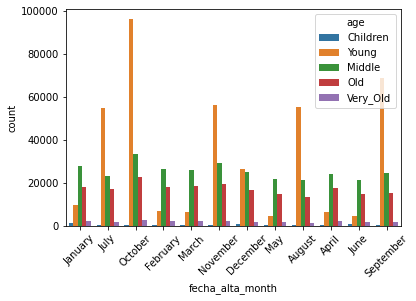

In [71]:
sns.countplot(x="fecha_alta_month",data=DATA_XTrain,hue='age')
plt.xticks(rotation=45)
plt.title = 'Age and Months'

**OBSERVATION:**
- 50% of the Users became the first holder of a contract in 4 Months July,September,October,November
- Highest number of Users became the first holder of a contract in the month of October
- And least in June
- Young age Users tend to became the first holder of a contract from July to November
- Middle Age Users tend to became the first holder of a contract from January to June


In [72]:
vectorizer = CountVectorizer()
vectorizer.fit(DATA_XTrain['fecha_alta_month'].values)
DATA_XTrain_fecha_alta_month = vectorizer.transform(DATA_XTrain['fecha_alta_month'].values)
DATA_XTest_fecha_alta_month = vectorizer.transform(DATA_XTest['fecha_alta_month'].values)
DATA_XTrain_fecha_alta_month_colns = vectorizer.get_feature_names_out()
print(DATA_XTrain_fecha_alta_month.shape)
print(DATA_XTest_fecha_alta_month.shape)

(944901, 12)
(931453, 12)


**ii) fecha_alta_day_count**

In [73]:
fecha_alta_day_count.head(2)

,fecha_alta_day
Monday,225421
Wednesday,177121


In [74]:
fecha_alta_day_count.tail(2)

,fecha_alta_day
Saturday,36622
Sunday,12047


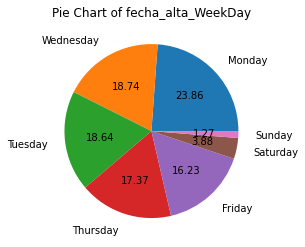

In [75]:
f_da = DATA_XTrain['fecha_alta_day'].value_counts().reset_index()

#Replacing other labels with blank space
#n - number of categories you want to show

mylabels = list(fecha_alta_day_count.index)

def autopct(pct):
  if pct > 1:
    return ('%.2f' % pct) 
  else:
    return ''

DATA_XTrain["fecha_alta_day"].value_counts().plot(x=None, y=None,title='Pie Chart of fecha_alta_WeekDay', kind='pie',pctdistance=0.6,autopct=autopct,labels=mylabels,labeldistance=1.2,ylabel='') 

Text(0.5, 0, 'WeekDay')

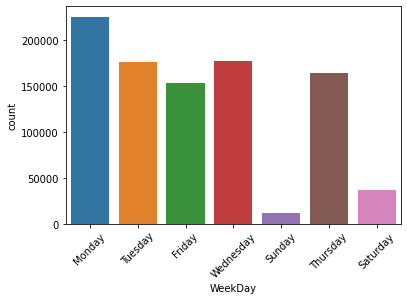

In [76]:
sns.countplot(x="fecha_alta_day",data=DATA_XTrain)
plt.xticks(rotation=45)
plt.xlabel('WeekDay')

**Observations:**

- less than 5% of the Users became the first holder of a contract On Saturdays and Sundays
- Highest number of Users Choose Mondays to buy product
- And least number of Users Choose Sunday
- Young age Users tend to became the first holder of a contract from July to November
- Middle Age Users tend to became the first holder of a contract from January to June

In [77]:
vectorizer = CountVectorizer()
vectorizer.fit(DATA_XTrain['fecha_alta_day'].values)
DATA_XTrain_fecha_alta_day = vectorizer.transform(DATA_XTrain['fecha_alta_day'].values)
DATA_XTest_fecha_alta_day = vectorizer.transform(DATA_XTest['fecha_alta_day'].values)
DATA_XTrain_fecha_alta_day_colns = vectorizer.get_feature_names_out()
print(DATA_XTrain_fecha_alta_day.shape)
print(DATA_XTest_fecha_alta_day.shape)

(944901, 7)
(931453, 7)


**8. ind_nuevo**
- New customer Index. 1 if the customer registered in the last 6 months.

In [78]:
DATA_XTrain['ind_nuevo'] = DATA_XTrain['ind_nuevo'].astype(np.int8)
DATA_XTest['ind_nuevo'] = DATA_XTest['ind_nuevo'].astype(np.int8)
print('Train')
print(DATA_XTrain.ind_nuevo.value_counts())
print('-'*20)
print('Test')
print(DATA_XTest.ind_nuevo.value_counts())

Train
0    890677
1     54224
Name: ind_nuevo, dtype: int64
--------------------
Test
0    897092
1     34361
Name: ind_nuevo, dtype: int64


In [79]:
from scipy.sparse import hstack,csr_matrix

In [80]:
DATA_XTrain_ind_nuevo = csr_matrix(DATA_XTrain['ind_nuevo'].values.reshape(-1,1))
DATA_XTest_ind_nuevo = csr_matrix(DATA_XTest['ind_nuevo'].values.reshape(-1,1))
DATA_XTrain_ind_nuevo_colns = np.array(['ind_nuevo'])

In [81]:
DATA_XTrain_ind_nuevo.shape

(944901, 1)

**9. Antiguedad**
- Customer seniority (in months)

In [82]:
DATA_XTrain['antiguedad'] = DATA_XTrain['antiguedad'].astype(np.int64)
DATA_XTest['antiguedad'] = DATA_XTest['antiguedad'].astype(np.int64)

In [83]:
#Lets bin Seniority of Months
bin = [-1000000,24,60,120,180,30000]
label = ['Low','Mid','High','Very_High','Highly_Exp']
DATA_XTrain['antiguedad'] = pd.cut(DATA_XTrain['antiguedad'],bin,labels=label)
DATA_XTest['antiguedad'] = pd.cut(DATA_XTest['antiguedad'],bin,labels=label)

print('Train')
print(DATA_XTrain.antiguedad.value_counts())
print('-'*20)
print('Test')
print(DATA_XTest.antiguedad.value_counts())

Train
Mid           277635
Low           257103
Very_High     173559
High          141095
Highly_Exp     95509
Name: antiguedad, dtype: int64
--------------------
Test
Mid           276800
Low           246217
Very_High     171053
High          138882
Highly_Exp     98501
Name: antiguedad, dtype: int64


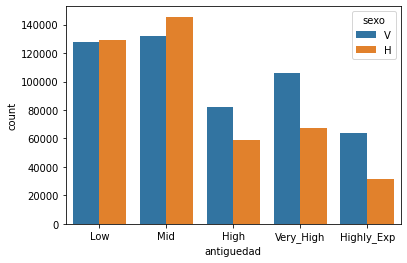

In [84]:
sns.countplot(x="antiguedad",data=DATA_XTrain,hue='sexo')

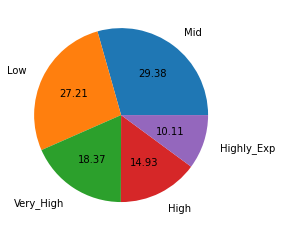

In [85]:
def autopct(pct):
  return ('%.2f' % pct)

DATA_XTrain["antiguedad"].value_counts().plot(x=None, y=None, kind='pie',pctdistance=0.6,autopct=autopct,labeldistance=1.2,ylabel='') 

**Observations:**
- More than 56% of users have less than 60 months of Experience
- Number of users with 120 to 180 months of experiences are Lowest, and 24 to 60 months is highest
- Number of female users with experience 24 to 60 months are more than Male


In [86]:
vectorizer = CountVectorizer()
vectorizer.fit(DATA_XTrain['antiguedad'].values)
DATA_XTrain_antiguedad = vectorizer.transform(DATA_XTrain['antiguedad'].values)
DATA_XTest_antiguedad = vectorizer.transform(DATA_XTest['antiguedad'].values)
DATA_XTrain_antiguedad_colns = vectorizer.get_feature_names_out()
print(DATA_XTrain_antiguedad.shape)
print(DATA_XTest_antiguedad.shape)

(944901, 5)
(931453, 5)


**10. indrel**
- 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)

In [87]:
DATA_XTrain['indrel'] = DATA_XTrain['indrel'].astype(np.int8)
DATA_XTest['indrel'] = DATA_XTest['indrel'].astype(np.int8)
DATA_XTrain['indrel'][DATA_XTrain['indrel']==99] =0
DATA_XTest['indrel'][DATA_XTest['indrel']==99] = 0

print('Train')
print(DATA_XTrain.indrel.value_counts())
print('-'*20)
print('Test')
print(DATA_XTest.indrel.value_counts())

Train
1    927350
0     17551
Name: indrel, dtype: int64
--------------------
Test
1    929583
0      1870
Name: indrel, dtype: int64


<ipython-input-87-f66cbf36905e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_XTrain['indrel'][DATA_XTrain['indrel']==99] =0
<ipython-input-87-f66cbf36905e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_XTest['indrel'][DATA_XTest['indrel']==99] = 0


In [88]:
DATA_XTrain_indrel = csr_matrix(DATA_XTrain['indrel'].values.reshape(-1,1))
DATA_XTest_indrel = csr_matrix(DATA_XTest['indrel'].values.reshape(-1,1))
DATA_XTrain_indrel_colns = np.array(['indrel'])

In [89]:
#indrel_1mes
DATA_XTrain.loc[DATA_XTrain['indrel_1mes']=='1.0','indrel_1mes'] = '1'
DATA_XTrain.loc[DATA_XTrain['indrel_1mes']=='2.0','indrel_1mes'] = '2'
DATA_XTrain.loc[DATA_XTrain['indrel_1mes']=='3.0','indrel_1mes'] = '3'
DATA_XTrain.loc[DATA_XTrain['indrel_1mes']=='4.0','indrel_1mes'] = '4'

DATA_XTest.loc[DATA_XTest['indrel_1mes']=='1.0','indrel_1mes'] = '1'
DATA_XTest.loc[DATA_XTest['indrel_1mes']=='2.0','indrel_1mes'] = '2'
DATA_XTest.loc[DATA_XTest['indrel_1mes']=='3.0','indrel_1mes'] = '3'
DATA_XTest.loc[DATA_XTest['indrel_1mes']=='4.0','indrel_1mes'] = '4'

print('Train')
print(DATA_XTrain.indrel_1mes.value_counts())
print('-'*20)
print('Test')
print(DATA_XTest.indrel_1mes.value_counts())

Train
1    943931
3       722
2       114
P        95
4        39
Name: indrel_1mes, dtype: Int64
--------------------
Test
1    930924
3       305
2       122
P        77
4        25
Name: indrel_1mes, dtype: Int64


In [90]:
vectorizer = CountVectorizer(token_pattern='\w')
vectorizer.fit(DATA_XTrain['indrel_1mes'].values)
DATA_XTrain_indrel_1mes = vectorizer.transform(DATA_XTrain['indrel_1mes'].values)
DATA_XTest_indrel_1mes = vectorizer.transform(DATA_XTest['indrel_1mes'].values)
DATA_XTrain_indrel_1mes_colns = vectorizer.get_feature_names_out()
print(DATA_XTrain_indrel_1mes.shape)
print(DATA_XTest_indrel_1mes.shape)

(944901, 5)
(931453, 5)


**11. tiprel_1mes**
- Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)



In [91]:
print('Train')
print(DATA_XTrain.tiprel_1mes.value_counts())
print('-'*20)
print('Test')
print(DATA_XTest.tiprel_1mes.value_counts())

Train
I    545827
A    398218
P       761
R        95
Name: tiprel_1mes, dtype: Int64
--------------------
Test
I    538439
A    392607
P       330
R        77
Name: tiprel_1mes, dtype: Int64


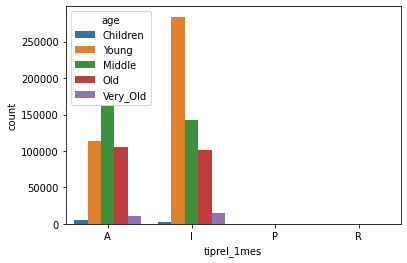

In [92]:
sns.countplot(x="tiprel_1mes",data=DATA_XTrain,hue='age')

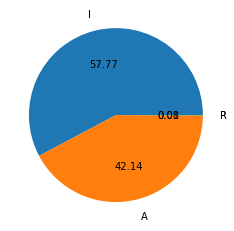

In [93]:
def autopct(pct):
  return ('%.2f' % pct)

DATA_XTrain["tiprel_1mes"].value_counts().plot(x=None, y=None, kind='pie',pctdistance=0.6,autopct=autopct,labeldistance=1.2,ylabel='') 

**OBSERVATIONS:**
- More than 57% of the users are Inactive at the start of the Month
- More than 150000 people with age 33-50 are Active at the start of the Month
- More than 250000 people with age 18-33 are Inactive at the start of the Month

In [94]:
vectorizer = CountVectorizer(token_pattern='\w')
vectorizer.fit(DATA_XTrain['tiprel_1mes'].values)
DATA_XTrain_tiprel_1mes = vectorizer.transform(DATA_XTrain['tiprel_1mes'].values)
DATA_XTest_tiprel_1mes = vectorizer.transform(DATA_XTest['tiprel_1mes'].values)
DATA_XTrain_tiprel_1mes_colns = vectorizer.get_feature_names_out()
print(DATA_XTrain_tiprel_1mes.shape)
print(DATA_XTest_tiprel_1mes.shape)

(944901, 4)
(931453, 4)


**12. indresi**
- Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)



In [95]:
DATA_XTrain.loc[DATA_XTrain['indresi']=='S','indresi'] = '1'
DATA_XTrain.loc[DATA_XTrain['indresi']=='N','indresi'] = '0'
DATA_XTrain['indresi'] = DATA_XTrain['indresi'].astype(np.int8)

DATA_XTest.loc[DATA_XTest['indresi']=='S','indresi'] = '1'
DATA_XTest.loc[DATA_XTest['indresi']=='N','indresi'] = '0'
DATA_XTest['indresi'] = DATA_XTest['indresi'].astype(np.int8)

print('Train')
print(DATA_XTrain.indresi.value_counts())
print('-'*20)
print('Test')
print(DATA_XTest.indresi.value_counts())

Train
1    940885
0      4016
Name: indresi, dtype: int64
--------------------
Test
1    927461
0      3992
Name: indresi, dtype: int64


In [96]:
DATA_XTrain_indresi = csr_matrix(DATA_XTrain['indresi'].values.reshape(-1,1))
DATA_XTest_indresi = csr_matrix(DATA_XTest['indresi'].values.reshape(-1,1))
DATA_XTrain_indresi_colns = np.array(['indresi'])

**indext**
- Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)

In [97]:
DATA_XTrain.loc[DATA_XTrain['indext']=='S','indext'] = '1'
DATA_XTrain.loc[DATA_XTrain['indext']=='N','indext'] = '0'
DATA_XTrain['indext'] = DATA_XTrain['indext'].astype(np.int8)

DATA_XTest.loc[DATA_XTest['indext']=='S','indext'] = '1'
DATA_XTest.loc[DATA_XTest['indext']=='N','indext'] = '0'
DATA_XTest['indext'] = DATA_XTest['indext'].astype(np.int8)

print('Train')
print(DATA_XTrain.indext.value_counts())
print('-'*20)
print('Test')
print(DATA_XTest.indext.value_counts())


Train
0    897824
1     47077
Name: indext, dtype: int64
--------------------
Test
0    885213
1     46240
Name: indext, dtype: int64


In [98]:
DATA_XTrain_indext = csr_matrix(DATA_XTrain['indext'].values.reshape(-1,1))
DATA_XTest_indext = csr_matrix(DATA_XTest['indext'].values.reshape(-1,1))
DATA_XTrain_indext_colns = np.array(['indext'])

**13. canal_entrada**
- channel used by the customer to join

In [99]:
print('Train')
print(DATA_XTrain.canal_entrada.value_counts())
print('-'*20)
print('Test')
print(DATA_XTest.canal_entrada.value_counts())

Train
KHE    254207
KAT    208366
KFC    202940
KHQ     76235
KHM     30709
        ...  
KDB         1
025         1
KDL         1
KDI         1
KGN         1
Name: canal_entrada, Length: 161, dtype: Int64
--------------------
Test
KHE    251804
KAT    206088
KFC    200892
KHQ     75073
KHM     31120
        ...  
KDL         1
KHR         1
KGN         1
KDB         1
025         1
Name: canal_entrada, Length: 163, dtype: Int64


In [100]:
import matplotlib.pyplot as plt

In [101]:
f_da = DATA_XTrain['canal_entrada'].value_counts().reset_index()
lenDl = len(f_da) - 4
lenD = ['' for i in range(lenDl)]
mylabels_ce = ['KHE','KAT','KFC','KHQ']
mylabels_ce = mylabels_ce+lenD

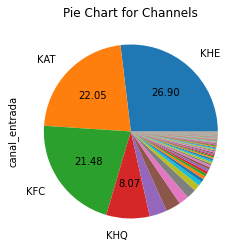

In [102]:
def autopct(pct):
  if pct > 5:
    return ('%.2f' % pct) 
  else:
    return ''

DATA_XTrain["canal_entrada"].value_counts().plot(x=None, y=None, kind='pie',pctdistance=0.6,autopct=autopct,labels=mylabels_ce, labeldistance=1.2,title ='Pie Chart for Channels') 


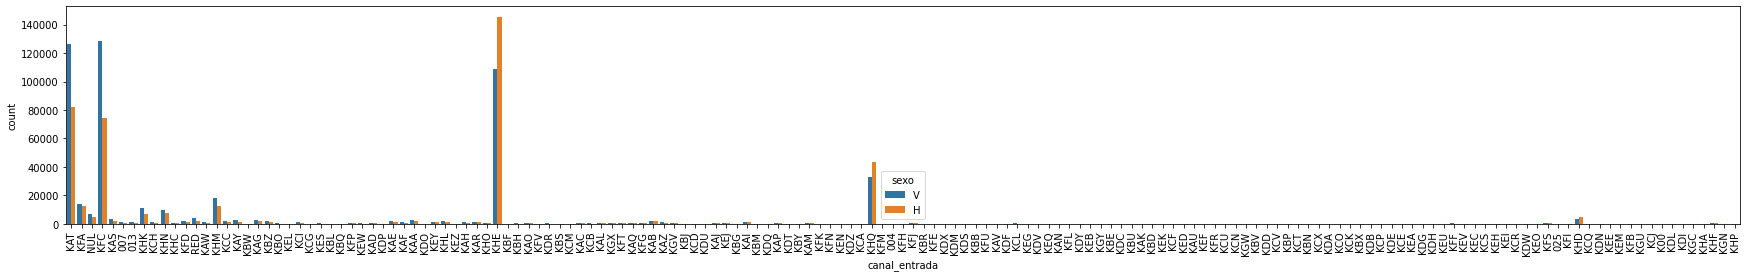

In [103]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(4)

sns.countplot(x="canal_entrada",data=DATA_XTrain,hue='sexo')
plt.xticks(rotation=90)
plt.label='Channels Used by Customers'

plt.show()

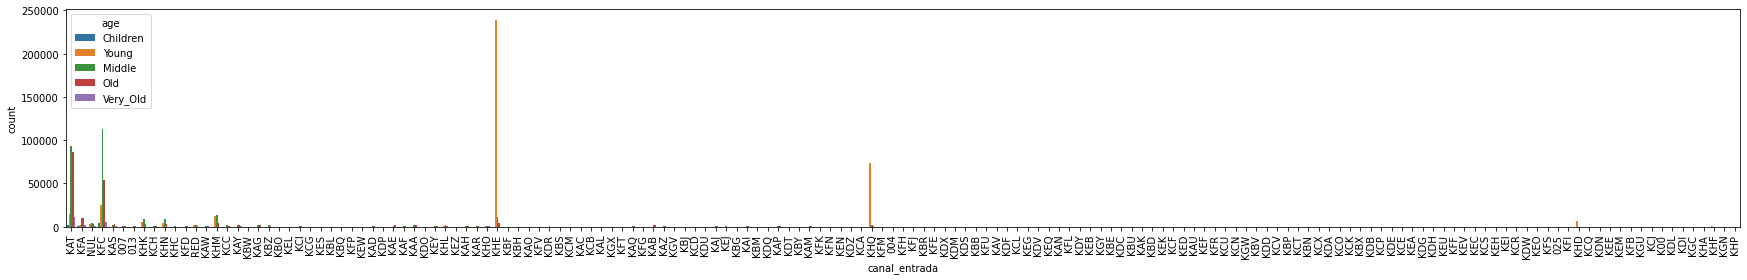

In [104]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(4)

sns.countplot(x="canal_entrada",data=DATA_XTrain,hue='age')
plt.xticks(rotation=90)
plt.label='Channels Used by Customers'

plt.show()

**Observation:**
- 75% of the users use only 4 channels to join
- 'KHE' is the most used channel, followed by 'KAT' and 'KFC'
- KHE and KHQ channels has more Female users than male
- KHE and KHQ channels has more Young Userbase
- While, KFC and CAT has more Middle Aged userbase

In [105]:
vectorizer = CountVectorizer()
vectorizer.fit(DATA_XTrain['canal_entrada'].values)
DATA_XTrain_canal_entrada = vectorizer.transform(DATA_XTrain['canal_entrada'].values)
DATA_XTest_canal_entrada = vectorizer.transform(DATA_XTest['canal_entrada'].values)
DATA_XTrain_canal_entrada_colns = vectorizer.get_feature_names_out()
print(DATA_XTrain_canal_entrada.shape)
print(DATA_XTest_canal_entrada.shape)

(944901, 161)
(931453, 161)


**14. indfall**
- Deceased index. N/S

In [106]:
DATA_XTrain.loc[DATA_XTrain['indfall']=='S','indfall'] = '1'
DATA_XTrain.loc[DATA_XTrain['indfall']=='N','indfall'] = '0'
DATA_XTrain['indfall'] = DATA_XTrain['indfall'].astype(np.int8)

DATA_XTest.loc[DATA_XTest['indfall']=='S','indfall'] = '1'
DATA_XTest.loc[DATA_XTest['indfall']=='N','indfall'] = '0'
DATA_XTest['indfall'] = DATA_XTest['indfall'].astype(np.int8)

print('Train')
print(DATA_XTrain.indfall.value_counts())
print('-'*20)
print('Test')
print(DATA_XTest.indfall.value_counts())


Train
0    942223
1      2678
Name: indfall, dtype: int64
--------------------
Test
0    929087
1      2366
Name: indfall, dtype: int64


In [107]:
DATA_XTrain_indfall = csr_matrix(DATA_XTrain['indfall'].values.reshape(-1,1))
DATA_XTest_indfall = csr_matrix(DATA_XTest['indfall'].values.reshape(-1,1))
DATA_XTrain_indfall_colns = np.array(['indfall'])

**15. nomprov**
- Province name



In [108]:
print(len(DATA_XTrain['nomprov'].value_counts()))
DATA_XTrain['nomprov'] = DATA_XTrain['nomprov'].str.replace(', ','').str.replace(' ','')

print(len(DATA_XTest['nomprov'].value_counts()))
DATA_XTest['nomprov'] = DATA_XTest['nomprov'].str.replace(', ','').str.replace(' ','')

53
53


In [109]:
#Top 5 Provience
DATA_XTrain['nomprov'].value_counts()[:5]

MADRID       303205
BARCELONA     90020
VALENCIA      48752
SEVILLA       41145
CORUÑAA       29163
Name: nomprov, dtype: Int64

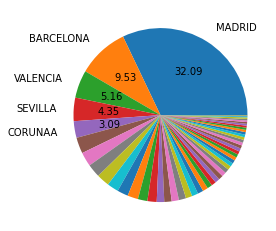

In [110]:
f_da = DATA_XTrain['nomprov'].value_counts().reset_index()
lenDl = len(f_da) - 5
lenD = ['' for i in range(lenDl)]
mylabels = ['MADRID','BARCELONA','VALENCIA','SEVILLA','CORUNAA']
mylabels = mylabels+lenD

def autopct(pct):
  if pct > 3:
    return ('%.2f' % pct) 
  else:
    return ''

DATA_XTrain["nomprov"].value_counts().plot(x=None, y=None, kind='pie',pctdistance=0.6,autopct=autopct,labels=mylabels,labeldistance=1.2,ylabel='') 

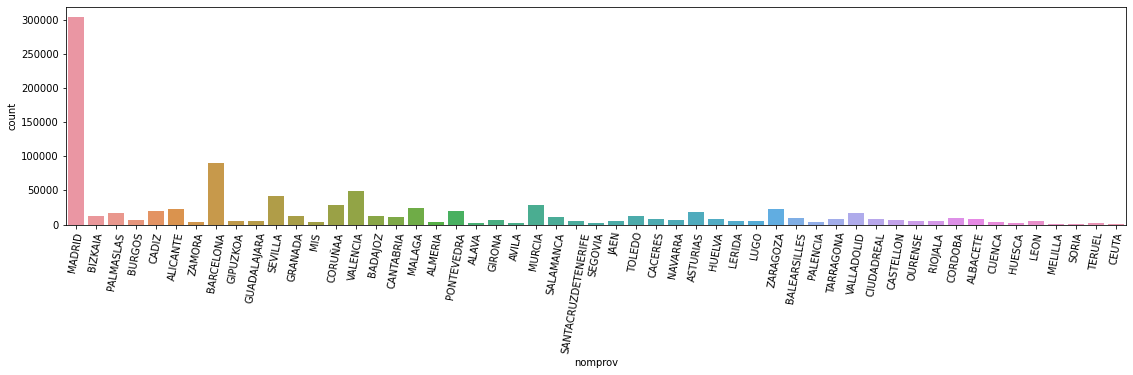

In [111]:
f = plt.figure()
f.set_figwidth(19)
f.set_figheight(4)

sns.countplot(x="nomprov",data=DATA_XTrain)
plt.xticks(rotation=80)
plt.label='Countries'

plt.show()

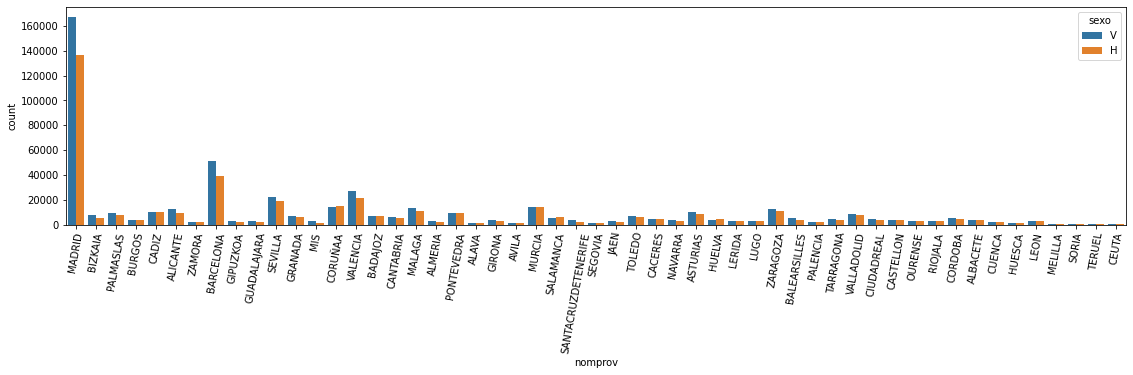

In [112]:
f = plt.figure()
f.set_figwidth(19)
f.set_figheight(4)

sns.countplot(x="nomprov",data=DATA_XTrain,hue='sexo')
plt.xticks(rotation=80)
plt.label='Countries'

plt.show()

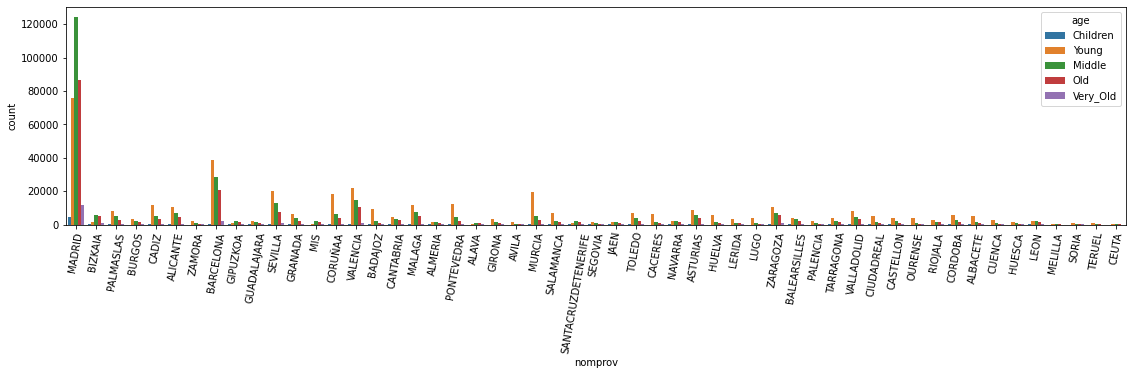

In [113]:
f = plt.figure()
f.set_figwidth(19)
f.set_figheight(4)

sns.countplot(x="nomprov",data=DATA_XTrain,hue='age')
plt.xticks(rotation=80)
plt.title ='Countries with Age Distribution'

plt.show()

**Observations:**
- More than 50% of the users belongs to 5 Proviences
- Whopping 32.07% of the users belongs to MADRID Provience.
- Followed by BARCELONA(9.53%), VALENCIA(5.16%), SEVILLA(4.36%) and CORUNAA(3.08%)
- Countries like Barcelona, Valencia, Alicante, Malanga has more Femal Users than Male

In [114]:
vectorizer = CountVectorizer()
vectorizer.fit(DATA_XTrain['nomprov'].values)
DATA_XTrain_nomprov = vectorizer.transform(DATA_XTrain['nomprov'].values)
DATA_XTest_nomprov = vectorizer.transform(DATA_XTest['nomprov'].values)
DATA_XTrain_nomprov_colns = vectorizer.get_feature_names_out()
print(DATA_XTrain_nomprov.shape)
print(DATA_XTest_nomprov.shape)

(944901, 53)
(931453, 53)


**16. ind_actividad_cliente**
- Activity index (1, active customer; 0, inactive customer)


In [115]:
DATA_XTrain['ind_actividad_cliente'] = DATA_XTrain['ind_actividad_cliente'].astype(np.int8)
DATA_XTest['ind_actividad_cliente'] = DATA_XTest['ind_actividad_cliente'].astype(np.int8)

print('Train')
print(DATA_XTrain.ind_actividad_cliente.value_counts())
print('-'*20)
print('Test')
print(DATA_XTest.ind_actividad_cliente.value_counts())

Train
0    549257
1    395644
Name: ind_actividad_cliente, dtype: int64
--------------------
Test
0    535730
1    395723
Name: ind_actividad_cliente, dtype: int64


In [116]:
DATA_XTrain_ind_actividad_cliente = csr_matrix(DATA_XTrain['ind_actividad_cliente'].values.reshape(-1,1))
DATA_XTest_ind_actividad_cliente = csr_matrix(DATA_XTest['ind_actividad_cliente'].values.reshape(-1,1))
DATA_XTrain_ind_actividad_cliente_colns = np.array(['ind_actividad_cliente'])

**17. renta**
- Gross income of the household


In [117]:
DATA_XTrain['renta'] = DATA_XTrain['renta'].astype(np.float64)
DATA_XTest['renta'][DATA_XTest['renta']=='         NA'] = '0'
DATA_XTest['renta'] = DATA_XTest['renta'].astype(np.float64)
DATA_XTest['renta'][DATA_XTest['renta']==0] = DATA_XTest['renta'].median()

<ipython-input-117-aece4a38a65f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_XTest['renta'][DATA_XTest['renta']=='         NA'] = '0'
<ipython-input-117-aece4a38a65f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_XTest['renta'][DATA_XTest['renta']==0] = DATA_XTest['renta'].median()


In [118]:
DATA_XTrain['renta'] = DATA_XTrain['renta'].groupby(DATA_XTrain['nomprov']).transform(lambda x: x.fillna(x.mean()))

In [119]:
DATA_XTrain['renta'] = np.log(DATA_XTrain['renta'])
DATA_XTest['renta'] = np.log(DATA_XTest['renta'])

In [120]:
DATA_XTrain['renta'].describe()

count    944901.000000
mean         11.623359
std           0.562165
min           7.092349
25%          11.271297
50%          11.792661
75%          11.806314
max          17.179158
Name: renta, dtype: float64

In [121]:
DATA_XTest['renta'].describe()

count    931453.000000
mean         11.622573
std           0.563267
min           7.092349
25%          11.268759
50%          11.787779
75%          11.806264
max          17.179158
Name: renta, dtype: float64

In [122]:
from sklearn.preprocessing import MinMaxScaler
normalizerr = MinMaxScaler()

normalizerr.fit(DATA_XTrain['renta'].values.reshape(-1,1))

DATA_XTrain['renta'] = normalizerr.transform(DATA_XTrain['renta'].values.reshape(-1,1))
DATA_XTest['renta'] = normalizerr.transform(DATA_XTest['renta'].values.reshape(-1,1))

**18. segmento**
- segmentation: 01 - VIP, 02 - Individuals 03 - college graduated


In [123]:
print('Train')
print(DATA_XTrain.segmento.value_counts())
print('-'*20)
print('Test')
print(DATA_XTest.segmento.value_counts())

Train
02 - PARTICULARES     558863
03 - UNIVERSITARIO    350562
01 - TOP               35476
Name: segmento, dtype: Int64
--------------------
Test
02 - PARTICULARES     549621
03 - UNIVERSITARIO    346417
01 - TOP               35415
Name: segmento, dtype: Int64


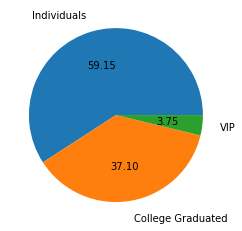

In [124]:
#English Translation of labels
mylabels = ['Individuals','College Graduated','VIP']

def autopct(pct):
  return ('%.2f' % pct) 

DATA_XTrain["segmento"].value_counts().plot(x=None, y=None, kind='pie',pctdistance=0.6,autopct=autopct,labels=mylabels,labeldistance=1.2,ylabel='') 

**OBSERVATIONS:**
- Less than 4% of the total Users are VIP
- Close to 60% of the Users are not Graduated 

In [125]:
vectorizer = CountVectorizer()
vectorizer.fit(DATA_XTrain['segmento'].values)
DATA_XTrain_segmento = vectorizer.transform(DATA_XTrain['segmento'].values)
DATA_XTest_segmento = vectorizer.transform(DATA_XTest['segmento'].values)
DATA_XTrain_segmento_colns = vectorizer.get_feature_names_out()
print(DATA_XTrain_segmento.shape)
print(DATA_XTest_segmento.shape)

(944901, 6)
(931453, 6)


**EDA On Product DataSet**

**1. ind_ahor_fin_ult1(Saving Account)**


<ipython-input-126-0832a9aa1fa8>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  target_counts = Prod_Data_YTrain[target_variables].sum(axis=0)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


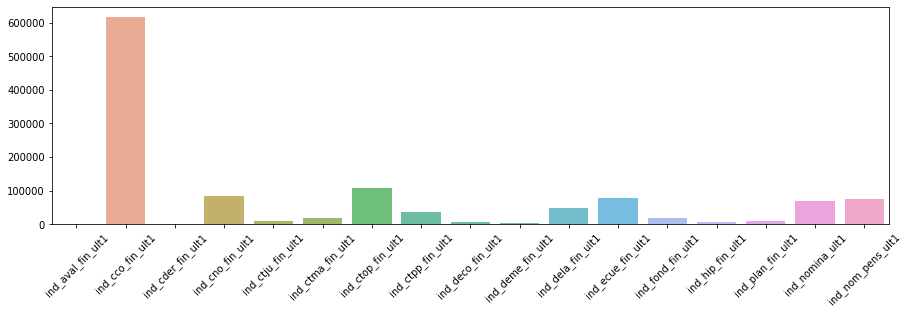

In [126]:
#Taking Sum of Purchases of product
target_variables = list(Prod_Data_YTrain.columns[1:])
target_counts = Prod_Data_YTrain[target_variables].sum(axis=0)
plt.figure(figsize=(15,4))
sns.barplot(target_counts.index, target_counts.values, alpha=0.8)
plt.ticklabel_format(style = 'plain', axis='y')
plt.xticks(rotation=45)
plt.show()


**Obsevations:**
- ind_aval_fin_ult1 is the most bought product
- ind_ahor_fin_ult1,ind_cder_fin_ult1 and ind_deme_fin_ult1 are the least bought products

**Creating Pickle File of all Data**

In [127]:
#Changing column names for All Categorical Features
#fecha_dato,ncodpers from df
ind_empleado_colns = [i+'_ind_empleado' for i in DATA_XTrain_ind_empleado_colns]
pais_residencia_colns = [i+'_pais_residencia' for i in DATA_XTrain_pais_residencia_colns]
sexo_colns = [i+'_sexo' for i in DATA_XTrain_sexo_colns]
age_colns = [i+'_age' for i in DATA_XTrain_age_colns]
fecha_alta_colns = [i+'_fecha_alta' for i in DATA_XTrain_fecha_alta_month_colns]+[i+'_fecha_alta' for i in DATA_XTrain_fecha_alta_day_colns]

ind_nuevo_colns = [i+'_ind_nuevo' for i in DATA_XTrain_ind_nuevo_colns]
antiguedad_colns = [i+'_antiguedad' for i in DATA_XTrain_antiguedad_colns]
indrel_colns = [i+'_indrel' for i in DATA_XTrain_indrel_colns]
indrel_1mes_colns = [i+'_indrel_1mes' for i in DATA_XTrain_indrel_1mes_colns]
tiprel_1mes_colns = [i+'_tiprel_1mes' for i in DATA_XTrain_tiprel_1mes_colns]
indresi_colns  = [i+'_indresi' for i in DATA_XTrain_indresi_colns]
indext_colns = [i+'_indext' for i in DATA_XTrain_indext_colns]
canal_entrada_colns = [i+'_canal_entrada' for i in DATA_XTrain_canal_entrada_colns]
indfall_colns = [i+'_indfall' for i in DATA_XTrain_indfall_colns]
nomprov_colns = [i+'_nomprov' for i in DATA_XTrain_nomprov_colns]
ind_actividad_cliente_colns = [i+'_ind_actividad_cliente' for i in DATA_XTrain_ind_actividad_cliente_colns]
segmento_colns = [i+'_segmento' for i in DATA_XTrain_segmento_colns]


New_Cust_Cols1 = ind_empleado_colns+pais_residencia_colns+sexo_colns+age_colns+fecha_alta_colns+ind_nuevo_colns+antiguedad_colns+indrel_colns+indrel_1mes_colns
New_Cust_Cols2 = tiprel_1mes_colns+indresi_colns+indext_colns+canal_entrada_colns+indfall_colns+nomprov_colns+ind_actividad_cliente_colns+segmento_colns
New_Cust_Cols = New_Cust_Cols1+New_Cust_Cols2
New_Cust_Cols

['a_ind_empleado',
 'b_ind_empleado',
 'f_ind_empleado',
 'n_ind_empleado',
 's_ind_empleado',
 'ad_pais_residencia',
 'ae_pais_residencia',
 'al_pais_residencia',
 'ao_pais_residencia',
 'ar_pais_residencia',
 'at_pais_residencia',
 'au_pais_residencia',
 'ba_pais_residencia',
 'be_pais_residencia',
 'bg_pais_residencia',
 'bm_pais_residencia',
 'bo_pais_residencia',
 'br_pais_residencia',
 'by_pais_residencia',
 'bz_pais_residencia',
 'ca_pais_residencia',
 'cd_pais_residencia',
 'cf_pais_residencia',
 'cg_pais_residencia',
 'ch_pais_residencia',
 'ci_pais_residencia',
 'cl_pais_residencia',
 'cm_pais_residencia',
 'cn_pais_residencia',
 'co_pais_residencia',
 'cr_pais_residencia',
 'cu_pais_residencia',
 'cz_pais_residencia',
 'de_pais_residencia',
 'dj_pais_residencia',
 'dk_pais_residencia',
 'do_pais_residencia',
 'dz_pais_residencia',
 'ec_pais_residencia',
 'ee_pais_residencia',
 'eg_pais_residencia',
 'es_pais_residencia',
 'et_pais_residencia',
 'fi_pais_residencia',
 'fr_pai

In [128]:
len(New_Cust_Cols)

389

In [129]:
#Customer Data
Cust_DATA_XTrain = hstack((DATA_XTrain_ind_empleado,
DATA_XTrain_pais_residencia,
DATA_XTrain_sexo,
DATA_XTrain_age,
DATA_XTrain_fecha_alta_month,
DATA_XTrain_fecha_alta_day,
DATA_XTrain_ind_nuevo,
DATA_XTrain_antiguedad,
DATA_XTrain_indrel,
DATA_XTrain_indrel_1mes,
DATA_XTrain_tiprel_1mes,
DATA_XTrain_indresi,
DATA_XTrain_indext,
DATA_XTrain_canal_entrada,
DATA_XTrain_indfall,
DATA_XTrain_nomprov,
DATA_XTrain_ind_actividad_cliente,
DATA_XTrain_segmento)).tocsr()

In [130]:
Cust_DATA_XTrain = Cust_DATA_XTrain.astype(np.int8)
Cust_DATA_XTrain.shape

(944901, 389)

In [131]:
Cust_DATA_XTrainDF = pd.DataFrame.sparse.from_spmatrix(Cust_DATA_XTrain, columns=New_Cust_Cols)
Cust_DATA_XTrainDF.head()

,a_ind_empleado,b_ind_empleado,f_ind_empleado,n_ind_empleado,s_ind_empleado,ad_pais_residencia,ae_pais_residencia,al_pais_residencia,ao_pais_residencia,ar_pais_residencia,...,valladolid_nomprov,zamora_nomprov,zaragoza_nomprov,ind_actividad_cliente_ind_actividad_cliente,01_segmento,02_segmento,03_segmento,particulares_segmento,top_segmento,universitario_segmento
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [132]:
Cust_DATA_XTest = hstack((DATA_XTest_ind_empleado,
DATA_XTest_pais_residencia,
DATA_XTest_sexo,
DATA_XTest_age,
DATA_XTest_fecha_alta_month,
DATA_XTest_fecha_alta_day,
DATA_XTest_ind_nuevo,
DATA_XTest_antiguedad,
DATA_XTest_indrel,
DATA_XTest_indrel_1mes,
DATA_XTest_tiprel_1mes,
DATA_XTest_indresi,
DATA_XTest_indext,
DATA_XTest_canal_entrada,
DATA_XTest_indfall,
DATA_XTest_nomprov,
DATA_XTest_ind_actividad_cliente,
DATA_XTest_segmento))
Cust_DATA_XTest.shape

(931453, 389)

In [133]:
Cust_DATA_XTest = Cust_DATA_XTest.astype(np.int8)
type(Cust_DATA_XTest.toarray()[0,0])

numpy.int8

In [134]:
Cust_DATA_XTest.shape

(931453, 389)

In [135]:
Cust_DATA_XTestDF = pd.DataFrame.sparse.from_spmatrix(Cust_DATA_XTest, columns=New_Cust_Cols)
Cust_DATA_XTestDF.head()

,a_ind_empleado,b_ind_empleado,f_ind_empleado,n_ind_empleado,s_ind_empleado,ad_pais_residencia,ae_pais_residencia,al_pais_residencia,ao_pais_residencia,ar_pais_residencia,...,valladolid_nomprov,zamora_nomprov,zaragoza_nomprov,ind_actividad_cliente_ind_actividad_cliente,01_segmento,02_segmento,03_segmento,particulares_segmento,top_segmento,universitario_segmento
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [136]:
Cust_DATA_XTestDF = Cust_DATA_XTestDF.astype(np.int8)

In [137]:
#Null Check
[print(i,j) for i,j in dict(Cust_DATA_XTrainDF.isna().sum()).items() if j!=0]

[]

In [138]:
#Null Check
[print(i,j) for i,j in dict(DATA_XTrain.isna().sum()).items() if j!=0]

[]

In [139]:
renta = DATA_XTrain.iloc[:,18].values.reshape(-1,1)
rentaDF = pd.DataFrame(renta,columns=['renta'])

renta2 = DATA_XTest.iloc[:,18].values.reshape(-1,1)
rentaDF2 = pd.DataFrame(renta2,columns=['renta'])

print(rentaDF.shape)
print(rentaDF2.shape)


(944901, 1)
(931453, 1)


In [140]:
print(Cust_DATA_XTrainDF.shape)
print(DATA_XTrain.iloc[:,:2].shape)
print(rentaDF.shape)
print(Prod_Data_YTrain.shape)

(944901, 389)
(944901, 2)
(944901, 1)
(944901, 24)


In [141]:
#Storing All Labels into list
Cust_Cols = list(DATA_XTrain.columns)
Prod_Cols = list(Prod_Data_YTrain.columns)
print(Cust_Cols)
print(Prod_Cols)
print(len(Prod_Cols))

['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'ind_actividad_cliente', 'renta', 'segmento', 'fecha_alta_month', 'fecha_alta_day']
['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']
24


In [154]:
AllCols = ['ncodpers','renta']+New_Cust_Cols+Prod_Cols
print(len(AllCols))
#Creating Dictionary
AllColsDict = dict()
for i,val in enumerate(AllCols):
  AllColsDict[i]=val

415


In [155]:
#Creating New DataFrame
NewTrainData = pd.concat([DATA_XTrain.iloc[:,1],rentaDF,Cust_DATA_XTrainDF,Prod_Data_YTrain],axis=1)
NewTrainData.rename(columns=AllColsDict,inplace=True)

In [156]:
NewTrainData.head()

,ncodpers,renta,a_ind_empleado,b_ind_empleado,f_ind_empleado,n_ind_empleado,s_ind_empleado,ad_pais_residencia,ae_pais_residencia,al_pais_residencia,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,15889,0.555447,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,15890,0.404941,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,1
2,15891,0.467340,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15892,0.582969,0,0,1,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1
4,15893,0.582969,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [157]:
NewTrainData.shape

(944901, 415)

In [158]:
NewTestData = pd.concat([DATA_XTest.iloc[:,1],rentaDF2,Cust_DATA_XTestDF,Prod_Data_YTest],axis=1)
NewTestData.rename(columns=AllColsDict,inplace=True)

In [159]:
NewTestData.head()

,ncodpers,renta,a_ind_empleado,b_ind_empleado,f_ind_empleado,n_ind_empleado,s_ind_empleado,ad_pais_residencia,ae_pais_residencia,al_pais_residencia,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,15889,0.555447,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,15890,0.404941,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,1
2,15892,0.582969,0,0,1,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1
3,15893,0.582969,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,15894,0.540949,1,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,1,1,1


In [160]:
NewTrainData = NewTrainData.copy()
NewTestData = NewTestData.copy()

In [162]:
NewTrainData.iloc[:,2:] = NewTrainData.iloc[:,2:].astype(np.int8)
NewTestData.iloc[:,2:] = NewTestData.iloc[:,2:].astype(np.int8)

In [163]:
NewTrainData.to_pickle('New_Train_Data.pkl')
NewTestData.to_pickle('New_Test_Data.pkl')

In [168]:
from google.colab import files
files.download("New_Train_Data.pkl")
files.download("New_Test_Data.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>